<a href="https://colab.research.google.com/github/acourage369/Semester_prooject-Multi-Class-Emotion-Detection-/blob/main/Semester_Project(Multi_Class_Emotion_Detection).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Importing Libraries***

In [ ]:
# Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Loading datasets from my google drive folder
train = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emotion-labels-train.csv')
test = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emotion-labels-test.csv')
val = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/emotion-labels-val.csv')
train

,text,label
0,Just got back from seeing @GaryDelaney in Burs...,joy
1,Oh dear an evening of absolute hilarity I don'...,joy
2,Been waiting all week for this game ❤️❤️❤️ #ch...,joy
3,"@gardiner_love : Thank you so much, Gloria! Yo...",joy
4,I feel so blessed to work with the family that...,joy
...,...,...
3608,@VivienLloyd Thank you so much! Just home - st...,sadness
3609,Just put the winter duvet on ☃️❄️🌬☔️,sadness
3610,@SilkInSide @TommyJoeRatliff that's so pretty!...,sadness
3611,@BluesfestByron second artist announcement loo...,sadness


# ***Exploratory Data Analysis (EDA)***

In [ ]:
# Exploratory Data Analysis (EDA) And Feature Engineering
# Merging the 3 datasets as one dataframe
df = pd.concat([train , val , test] , axis = 0)
df = df.sample(frac=1).reset_index(drop = True)
df.head()

,text,label
0,The radio just told me Lady GaGa is going coun...,fear
1,Think of #anger as this barrier between you an...,anger
2,SO many great pics from the show in Tokyo😍 I l...,fear
3,Omg I actually thought she was going to jump. ...,fear
4,*Still waits for Yang. Guess she really needs ...,sadness


In [ ]:
# Shape of the dataset(number of rows and columns)
df.shape

(7102, 2)

In [ ]:
# instances of unique emotions under the label column
df.label.value_counts()

,count
label,
fear,2252
anger,1701
joy,1616
sadness,1533


In [ ]:
# Information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7102 entries, 0 to 7101
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    7102 non-null   object
 1   label   7102 non-null   object
dtypes: object(2)
memory usage: 111.1+ KB


In [ ]:
# Checking for null values
df.isnull().sum()

,0
text,0
label,0


In [ ]:
# Checking for duplicate values
df.duplicated().sum()

0

In [ ]:
# checking for the number of rows in the text column of a DataFrame that only contain whitespace characters.
df.text.str.isspace().sum()

0

In [ ]:
# Description of the dataset
df.describe()

,text,label
count,7102,7102
unique,6908,4
top,"Just watched Django Unchained, Other people ma...",fear
freq,3,2252


# ***Visual Representation Of Text***

Text(0.5, 1.0, 'Word Cloud Of Text')

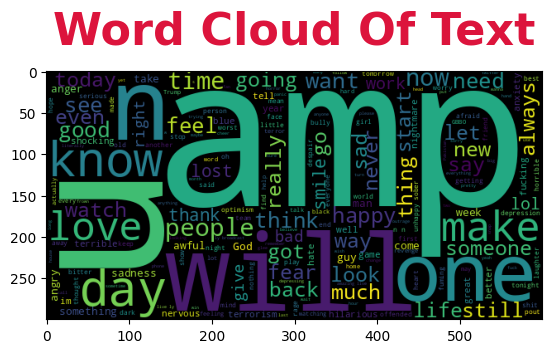

In [ ]:
# Using the WordCloud for Visual Representation Of Text
from wordcloud import WordCloud
wc = WordCloud(width=600 , height = 300 , random_state = 101).generate(' '.join(df.text))
plt.imshow(wc)
plt.title('Word Cloud Of Text' , fontsize = 32 , fontweight = 'bold' , color = 'crimson' , pad = 20)

In [ ]:
# Adding a New Feature -- text-len
df['text-len'] = df.text.apply(len)
df.head(5)

,text,label,text-len
0,The radio just told me Lady GaGa is going coun...,fear,131
1,Think of #anger as this barrier between you an...,anger,71
2,SO many great pics from the show in Tokyo😍 I l...,fear,117
3,Omg I actually thought she was going to jump. ...,fear,70
4,*Still waits for Yang. Guess she really needs ...,sadness,121


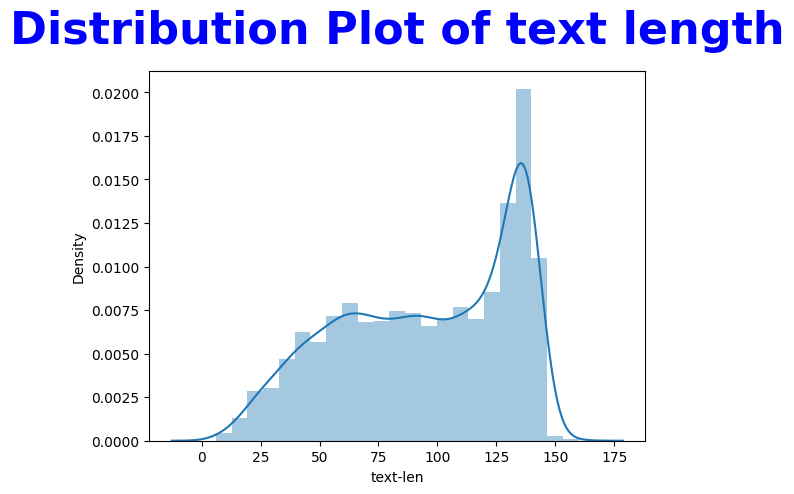

In [ ]:
# Using histogram to visualize the representation Of Text
sns.distplot(df['text-len'])
plt.title('Distribution Plot of text length', fontsize = 32 , color = 'blue' , fontweight = 'bold' , pad = 20);

<Axes: xlabel='label', ylabel='count'>

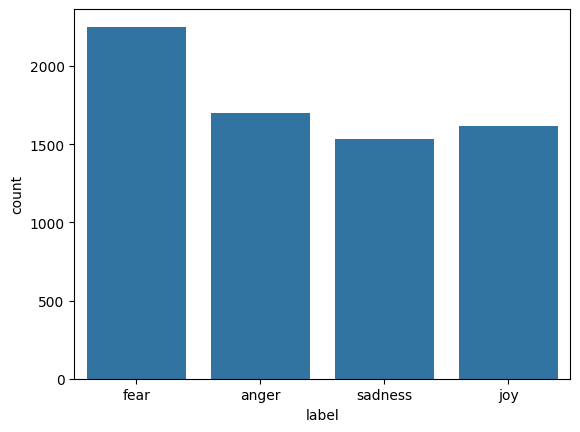

In [ ]:
# Using bar chart to visualize the imbalance among the emotions
sns.countplot(df , x='label')

# ***Pre-Processing the Text Data***

In [ ]:
# TEXT PREPROCESSING

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.tokenize import RegexpTokenizer

# remove hashtags
def hashtags(text):
  hash = re.findall(r"#(\w+)", text)
  return hash

# translate emoji
def emoji(text):
  for emot in UNICODE_EMOJI:
    if text == None:
      text = text
    else:
      text = text.replace(emot, "_".join(UNICODE_EMOJI[emot].replace(",", "").replace(":", "").split()))
    return text

# remove retweet username and tweeted at @username
def remove_users(tweet):
  '''Takes a string and removes retweet and @user information'''
  tweet = re.sub('(@[A-Za-z]+[A-Za-z0-9-_]+)', '', tweet)
  # remove tweeted at
  return tweet

# remove links
def remove_links(tweet):
  '''Takes a string and removes web links from it'''
  tweet = re.sub(r'http\S+', '', tweet) # remove http links
  tweet = re.sub(r'bit.ly/\S+', '', tweet) # remove bitly links
  tweet = tweet.strip('[link]') # remove [links]
  return tweet
def clean_html(text):
  html = re.compile('<.*?>')#regex
  return html.sub(r'',text)

# remove non ascii character
def non_ascii(s):
  return "".join(i for i in s if ord(i)<128)

def lower(text):
  return text.lower()

# remove stopwords
def removeStopWords(str):
#select english stopwords
  cachedStopWords = set(stopwords.words("english"))
#add custom words
  cachedStopWords.update(('and','I','A','http','And','So','arnt','This','When','It','many','Many','so','cant','Yes','yes','No','no','These','these','mailto','regards','ayanna','like','email'))
#remove stop words
  new_str = ' '.join([word for word in str.split() if word not in cachedStopWords])
  return new_str

# remove email address
def email_address(text):
  email = re.compile(r'[\w\.-]+@[\w\.-]+')
  return email.sub(r'',text)

def punct(text):
  token=RegexpTokenizer(r'\w+')#regex
  text = token.tokenize(text)
  text= " ".join(text)
  return text

# remove digits and special characters
def remove_digits(text):
    pattern = r'[^a-zA-z.,!?/:;\"\'\s]'
    #when the ^ is on the inside of []; we are matching any character that is not included in this expression within the []
    return re.sub(pattern, '', text)

def remove_special_characters(text):
    # define the pattern to keep
    pat = r'[^a-zA-z0-9.,!?/:;\"\'\s]'
    return re.sub(pat, '', text)

def remove_(tweet):
  tweet = re.sub('([_]+)', "", tweet)
  return tweet

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# A function that uses text preprocessing function we created
def text_preprocess(data, col):
   data[col] = data[col].apply(func = clean_html)
   data[col] = data[col].apply(func = punct)
   data[col] = data[col].apply(func = remove_)
   data[col] = data[col].apply(func = remove_digits)
   data[col] = data[col].apply(func = remove_special_characters)
   data[col] = data[col].apply(func = removeStopWords)
   data[col] = data[col].apply(func = lower)
   data[col] = data[col].apply(func = non_ascii)
   data[col] = data[col].apply(func = email_address)

   return data

In [ ]:
# Preprocessed Data
preprocessed_df = text_preprocess(df , 'text')
preprocessed_df.head(5)

,text,label,text-len
0,the radio told lady gaga going country beatles...,fear,131
1,think anger barrier truth laurascoe,anger,71
2,so great pics show tokyo outfits except lace o...,fear,117
3,omg actually thought going jump southpark sout...,fear,70
4,still waits yang guess really needs sleep some...,sadness,121


In [ ]:
# Splitting the preprocessed data into target variables and features
y = preprocessed_df['label'] #Target Variables
x = preprocessed_df['text']  #Features

In [ ]:
print(x)

0       the radio told lady gaga going country beatles...
1                     think anger barrier truth laurascoe
2       so great pics show tokyo outfits except lace o...
3       omg actually thought going jump southpark sout...
4       still waits yang guess really needs sleep some...
                              ...                        
7097    dying dull dreary affair advice nothing whatev...
7098    good job texas saying obama refugees could ter...
7099    ayeshashafique concerned pakistan internal aff...
7100          rils ppl get triggered u smiling irrelevant
7101    ya talkin know know ya talkin bout new shit ch...
Name: text, Length: 7102, dtype: object


In [ ]:
print(y)

0          fear
1         anger
2          fear
3          fear
4       sadness
         ...   
7097    sadness
7098       fear
7099       fear
7100        joy
7101        joy
Name: label, Length: 7102, dtype: object


In [ ]:
# Encode Categorical Variables

# Encoding the target variable
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
print(y)

[1 0 1 ... 1 2 2]


In [ ]:
# Split data into train and test data

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y , test_size = 0.33 , random_state = 42)


In [ ]:
print(x_train.shape , x_test.shape)

(4758,) (2344,)


In [ ]:
# Convert Text Column to numeric vector

from sklearn.feature_extraction.text import TfidfVectorizer

v = TfidfVectorizer()

x_train_cv = v.fit_transform(x_train)
x_test_cv = v.transform(x_test)

# print(v.vocabulary_)


In [ ]:
# Handling class imbalance
!pip install imblearn

from imblearn.over_sampling import SMOTE

In [ ]:
# Apply SMOTE to training data
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train_cv, y_train)

In [ ]:
x_train_resampled

<6100x12457 sparse matrix of type '<class 'numpy.float64'>'
	with 62499 stored elements in Compressed Sparse Row format>

In [ ]:
y_train_resampled

array([3, 1, 2, ..., 3, 3, 3])

<Axes: ylabel='count'>

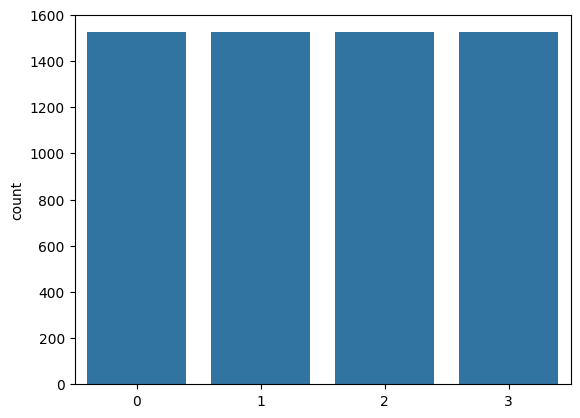

In [ ]:
sns.countplot(x= y_train_resampled)

In [ ]:
print(x_train_cv)

  (0, 11500)	0.4529842886423851
  (0, 9541)	0.4529842886423851
  (0, 11400)	0.35030212741563227
  (0, 8175)	0.23641526512289898
  (0, 10857)	0.31556160243616654
  (0, 4695)	0.35909851090958067
  (0, 12216)	0.25803214984288797
  (0, 12164)	0.3404339210612748
  (1, 9667)	0.16948859024419696
  (1, 6485)	0.15815891434804075
  (1, 9009)	0.2867659517118718
  (1, 9870)	0.31136176292207746
  (1, 359)	0.14571611654744734
  (1, 10767)	0.26217014050166626
  (1, 4227)	0.19859089084846776
  (1, 3552)	0.19008627824026894
  (1, 11268)	0.31136176292207746
  (1, 2402)	0.31136176292207746
  (1, 11745)	0.2969741356892901
  (1, 3047)	0.31136176292207746
  (1, 11189)	0.31136176292207746
  (1, 4090)	0.31136176292207746
  (1, 12216)	0.16916453086993666
  (2, 2281)	0.27930563147686344
  (2, 17)	0.3262374715873091
  :	:
  (4754, 11059)	0.2029845140309659
  (4755, 6687)	0.3784954780495639
  (4755, 9962)	0.3784954780495639
  (4755, 5091)	0.3244573850044345
  (4755, 8928)	0.3049609480997129
  (4755, 10160)	0.3186

In [ ]:
print(x_test_cv)

  (0, 11904)	0.5548753024732643
  (0, 9552)	0.33979648346140134
  (0, 8680)	0.44707350056426026
  (0, 4792)	0.4854032292344029
  (0, 4374)	0.37571363919147405
  (1, 10382)	0.46554654699795883
  (1, 8171)	0.6065824514154015
  (1, 7429)	0.35029136978946057
  (1, 3539)	0.3561513775486404
  (1, 3405)	0.4071563517058143
  (2, 11204)	0.24570246719519462
  (2, 10823)	0.6215843925682376
  (2, 10675)	0.41106508622208104
  (2, 7607)	0.38031837418364306
  (2, 1800)	0.33854899140907346
  (2, 345)	0.35359744073340255
  (3, 10430)	0.28328689845382465
  (3, 10084)	0.8266525006703063
  (3, 10083)	0.3545019643520345
  (3, 4155)	0.3327499565296598
  (4, 12171)	0.4138658948922873
  (4, 11643)	0.31292730065765184
  (4, 11636)	0.2737630020177072
  (4, 9250)	0.24046909616906284
  (4, 7627)	0.2659768324954226
  :	:
  (2339, 2734)	0.32888223278022566
  (2339, 866)	0.3672301751306674
  (2340, 11909)	0.200518826731585
  (2340, 11621)	0.2509802093428535
  (2340, 10362)	0.4120976940193852
  (2340, 10202)	0.300146

# ***Model Training***

In [ ]:
# Machine Learning Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

In [ ]:
# Naive Bayes
NB_model = MultinomialNB(alpha=0.5)
NB_model.fit(x_train_cv , y_train)
y_pred_nb = NB_model.predict(x_test_cv)
print("Naive Bayes Accuracy:", accuracy_score(y_test , y_pred_nb))
print(classification_report(y_test , y_pred_nb))


Naive Bayes Accuracy: 0.8114334470989761
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       572
           1       0.74      0.92      0.82       766
           2       0.90      0.81      0.86       524
           3       0.80      0.67      0.73       482

    accuracy                           0.81      2344
   macro avg       0.83      0.80      0.81      2344
weighted avg       0.82      0.81      0.81      2344



In [ ]:
# Random Forest
rfc = RandomForestClassifier(random_state = 0)
rfc.fit(x_train_cv , y_train)
y_pred_rf = rfc.predict(x_test_cv)
print("Random Forest Accuracy:", accuracy_score(y_test , y_pred_rf))
print(classification_report(y_test , y_pred_rf))


Random Forest Accuracy: 0.8319112627986348
              precision    recall  f1-score   support

           0       0.90      0.77      0.83       572
           1       0.75      0.91      0.82       766
           2       0.93      0.87      0.90       524
           3       0.82      0.75      0.78       482

    accuracy                           0.83      2344
   macro avg       0.85      0.82      0.83      2344
weighted avg       0.84      0.83      0.83      2344



In [ ]:
# Logistic Regression
lr = LogisticRegression(random_state = 0, C=10)
lr.fit(x_train_cv , y_train)
y_pred_lr = lr.predict(x_test_cv)
print("Logistic Regression Accuracy:", accuracy_score(y_test , y_pred_lr))
print(classification_report(y_test , y_pred_lr))


Logistic Regression Accuracy: 0.8732935153583617
              precision    recall  f1-score   support

           0       0.88      0.88      0.88       572
           1       0.87      0.88      0.88       766
           2       0.92      0.91      0.92       524
           3       0.81      0.80      0.81       482

    accuracy                           0.87      2344
   macro avg       0.87      0.87      0.87      2344
weighted avg       0.87      0.87      0.87      2344



In [ ]:
# Voting Classifier
voting_clf = VotingClassifier(estimators=[('nb', NB_model), ('rf', rfc), ('lr', lr)], voting='soft')
voting_clf.fit(x_train_cv, y_train)
y_pred_vc = voting_clf.predict(x_test_cv)


In [ ]:
print("Voting Classifier Accuracy:", accuracy_score(y_test , y_pred_vc))
print(classification_report(y_test , y_pred_vc))

Voting Classifier Accuracy: 0.871160409556314
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       572
           1       0.83      0.90      0.87       766
           2       0.92      0.91      0.92       524
           3       0.83      0.80      0.82       482

    accuracy                           0.87      2344
   macro avg       0.88      0.87      0.87      2344
weighted avg       0.87      0.87      0.87      2344



In [ ]:
from sklearn.ensemble import AdaBoostClassifier

# Create an AdaBoost classifier
ada_boost = AdaBoostClassifier(n_estimators=100, random_state=42)

# Train the model
ada_boost.fit(x_train_cv, y_train)

# Make predictions
y_pred_ada = ada_boost.predict(x_test_cv)

# Evaluate the model
print("AdaBoost Accuracy:", accuracy_score(y_test, y_pred_ada))
print(classification_report(y_test, y_pred_ada))


AdaBoost Accuracy: 0.7589590443686007
              precision    recall  f1-score   support

           0       0.93      0.65      0.77       572
           1       0.60      0.96      0.74       766
           2       0.95      0.67      0.78       524
           3       0.91      0.67      0.77       482

    accuracy                           0.76      2344
   macro avg       0.85      0.74      0.76      2344
weighted avg       0.82      0.76      0.76      2344



In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
# Instantiate a BaggingClassifier with a base estimator (e.g., a decision tree)
bagging_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Fit the model to the training data
bagging_clf.fit(x_train_cv, y_train)

# Make predictions on the test data
y_pred_bagging = bagging_clf.predict(x_test_cv)

# Evaluate the model
print("Bagging Classifier Accuracy:", accuracy_score(y_test, y_pred_bagging))
print(classification_report(y_test, y_pred_bagging))

Bagging Classifier Accuracy: 0.8250853242320819
              precision    recall  f1-score   support

           0       0.91      0.76      0.83       572
           1       0.74      0.90      0.81       766
           2       0.90      0.85      0.88       524
           3       0.82      0.77      0.79       482

    accuracy                           0.83      2344
   macro avg       0.84      0.82      0.83      2344
weighted avg       0.83      0.83      0.83      2344

